#naive bayers: clasificando  diabeticos

##P1. Importar librerias

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from  sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as pl
import seaborn as sb
#guardar las graficas directamente en el libro
%matplotlib inline

##P2. Cargar datos desde GITHUB

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/naive_bayes_diabetes.csv')
df.head(10)

,glucosa,presion_sanguinea,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
5,45,82,0
6,40,85,0
7,30,63,1
8,65,65,1
9,45,82,0


##P3. Conociendo los datos

In [5]:
df.describe()
#df.isnull().sum()

,glucosa,presion_sanguinea,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


###P2.1 graficando datos

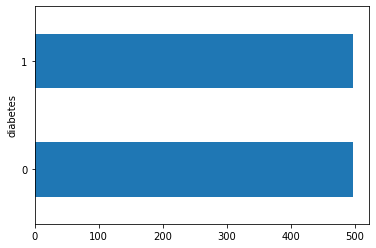

In [6]:
df.groupby('diabetes').size().plot.barh()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


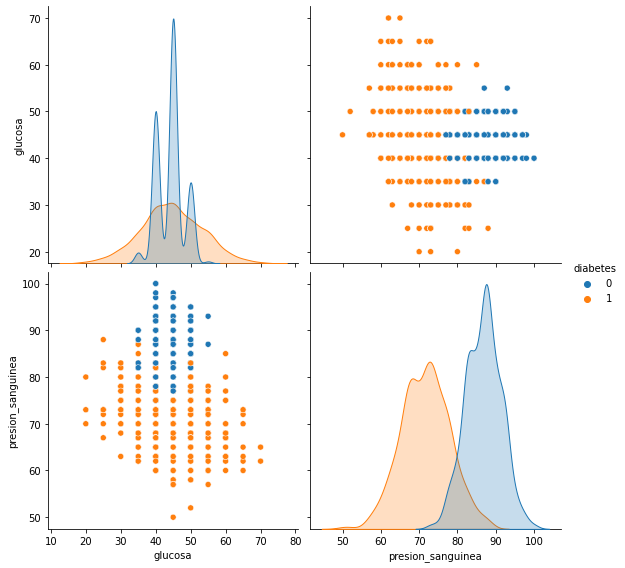

In [7]:
sb.pairplot(df, hue='diabetes', size=4, vars=["glucosa","presion_sanguinea"],kind='scatter')

##P3. separando los datos (X y Y)

In [8]:
X= df.drop('diabetes',axis=1)
Y= df['diabetes']

##P4. separando en TRAIN y TEST

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.3, random_state=42)

##P5. instanciar algoritmo y entrenar

In [13]:
naba = GaussianNB();
naba.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

##P6. realizar predicciones

In [14]:
Y_pred = naba.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(' Accuracy Naive Bayes : '+ str(accuracy*100))

 Accuracy Naive Bayes : 93.31103678929766


#naive bayer LOAD_WINE()

##P1. Importar librerias

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from  sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as pl
import seaborn as sb
#guardar las graficas directamente en el libro
%matplotlib inline

##P2. Cargar datos desde sklearn.dataset

In [ ]:
from sklearn import datasets
db_wine = datasets.load_wine()
print(db_wine.DESCR)

##P2.1 convirtiendo en dataframe

In [18]:
df_wine = pd.DataFrame(db_wine.data, columns=db_wine.feature_names)
df_wine['wine_class'] =db_wine.target
df_wine.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


##P3. Conociendo los datos

In [19]:
#df_wine.describe()
#df_wine.isnull().sum()
df_wine.shape

(178, 14)

###P3.1 Graficando datos

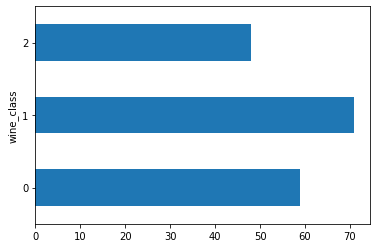

In [ ]:
df_wine.groupby('wine_class').size().plot.barh()

In [ ]:
sb.pairplot(df_wine, hue='wine_class', size=4, vars=["alcohol","malic_acid","color_intensity"],kind='scatter')

##P3. separando los datos (X y Y)

In [22]:
X= df_wine.drop('wine_class',axis=1)
Y= df_wine['wine_class']

##P4. separando en TRAIN y TEST

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.3, random_state=109)

##P5. instanciar algoritmo y entrenar

In [24]:
naba_wine = GaussianNB();
naba_wine.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

##P6. realizar predicciones

In [25]:
Y_pred = naba_wine.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(' Accuracy wine Naive Bayes : '+ str(accuracy*100))

 Accuracy wine Naive Bayes : 90.74074074074075


#¿Que es mejor comprar casa o arrendar ?

---
Algunos supuestos:

*   La data esta creada en clase y Está pensado en DOLARES pero podría ser cualquier otra moneda
*   No tiene en cuenta ubicación geográfica, cuando sabemos que dependerá mucho los precios de los inmuebles de distintas zonas
*   Se supone una hipoteca fija a 30 años con interés de mercado “bajo”.


##P1. librerias 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

##P2.cargamos el dataset

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/Naibe_bayes_comprar_alquilar_casa.csv")
df.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


###descripción de las columnas


*   ingresos: los ingresos de la familia mensual (DOLARES)
*   gastos comunes: pagos de luz, agua, gas, etc mensual
*   pago coche: si se está pagando cuota por uno o más coches, y los gastos en combustible, etc al mes.
*   gastos_otros: compra en supermercado y lo necesario para vivir al mes
*   ahorros: suma de ahorros dispuestos a usar para la compra de la casa.
*   vivienda: precio de la vivienda que quiere comprar esa familia
*   estado civil:
*   *   0-soltero
*   *   1-casados
*   *   2-divorciados
*   hijos: cantidad de hijos menores y que no trabajan.
*   trabajo:
*   *   0-sin empleo 
*   *   1-autónomo (freelance)
*   *   2-empleado
*   *   3-empresario
*   *   4-pareja: autónomos
*   *   5-pareja: empleados
*   *   6-pareja: autónomo y asalariado
*   *   7-pareja:empresario y autónomo
*   *   8-pareja: empresarios los dos o empresario y empleado
*   comprar: 
*   *   0-No comprar 
*   *   1-Comprar (esta será nuestra columna de salida, para aprender)



##P3. Conociendo los datos

In [29]:
df.describe()
#df.isnull().sum()
#df.shape

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [30]:
print(df.groupby('comprar').size())

comprar
0    135
1     67
dtype: int64


###Graficando

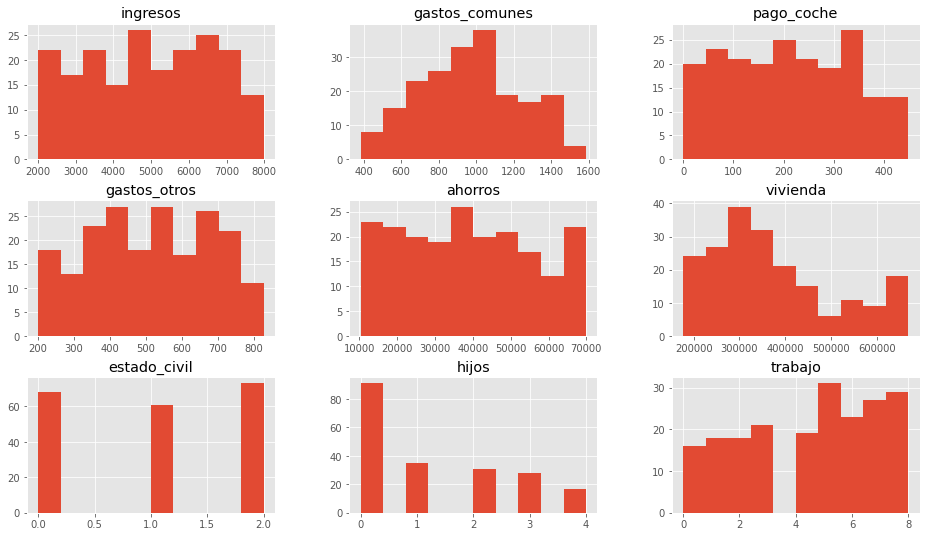

In [33]:
df.drop(['comprar'], axis=1).hist()
plt.show()

###Preparemos los datos de entrada

In [35]:
#resumimos algunas columnas 
df['gastos']=(df['gastos_comunes']+df['gastos_otros']+df['pago_coche'])
# que es lo que se va a financiar
df['financiar']=df['vivienda']-df['ahorros']
#df.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1).head(10)

In [37]:
#df_gastos = df.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1)
#df_gastos.describe()
df_gastos.head()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420


##P4. separando los datos (X y Y)

In [38]:
X=df.drop(['comprar'], axis=1)
y=df['comprar']

### usamos todas las columnas o las mejores?

In [40]:
#Utilizar una Clase de SkLearn llamada SelectKBest con la que seleccionaremos las 5 mejores características
best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print('LAS MEJORES 5 CARACTERISTICAS / COLUMNAS, SON:', X.columns[selected])

LAS MEJORES 5 CARACTERISTICAS / COLUMNAS, SON: Index(['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'], dtype='object')


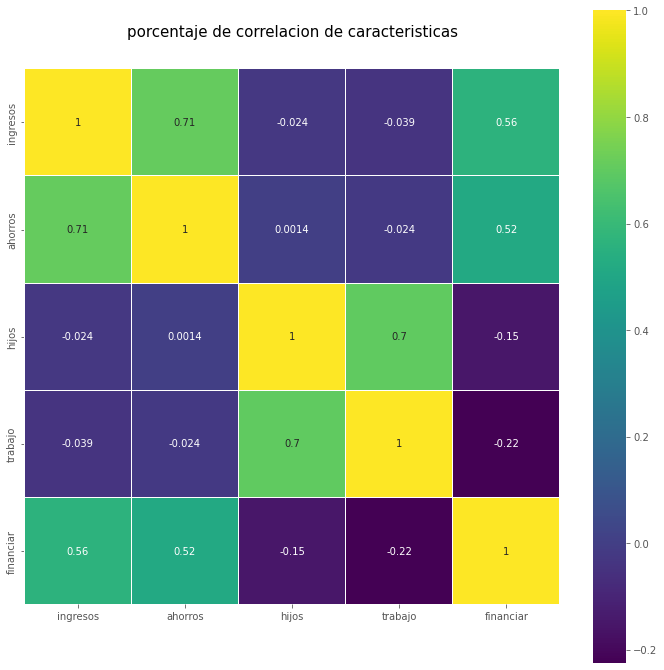

In [41]:
used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('porcentaje de correlacion de caracteristicas', y=1.05, size=15)
sb.heatmap(df[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

###hay una buena correlacción???

##P5. separando en TRAIN y TEST

In [42]:
# separamos la data de entrenamiento VS testeo
X_train, X_test = train_test_split(df, test_size=0.35, random_state=42) 
y_train =X_train["comprar"]
y_test = X_test["comprar"]

##P6. instanciar algoritmo y entrenar

In [43]:
# Instanciamos el clasificador
gnb = GaussianNB()
# entrenamos el clasificador
gnb.fit(
    X_train[used_features].values,
    y_train
  ) 
y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.87
Precisión en el set de Test: 0.85


##Probemos el modelo: ¿Comprar o Alquilar?

In [46]:
#                 ['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar']
print(gnb.predict([[4000,        3800,     4,       5,         200000],
                   [6000,        34000,    2,       5,         320000] ]))
#Resultado esperado 0-Alquilar, 1-Comprar casa

[0 1]
